In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [6]:
saved_songs_df = pd.read_pickle("./saved_songs_df.pkl")
saved_songs_df.head()

,id,name,album,artist,popularity,added_at,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,751gBcu62kORDelX7FV0mM,Thank You,No Angel,Dido,58,2021-08-27T05:32:10Z,0.722,0.595,1,-9.928,0,0.0415,0.284000,0.00054,0.0694,0.7380,79.981,4
1,7zKncUwLtKCMzwhEb3Jiqd,Overkill,Overkill,RIOT,48,2021-08-27T05:19:49Z,0.435,0.956,8,-1.369,0,0.1440,0.000448,0.65500,0.3430,0.1030,174.029,4
2,7eYYwvDDg5fBWdYqntL1lI,Angelic Layer,Cruel Choreography,GHOST DATA,32,2021-08-26T07:00:46Z,0.754,0.588,2,-5.993,0,0.0544,0.030900,0.60100,0.1090,0.0902,128.017,4
3,0nJ7Y8j5JoegBoXqHM9pJ6,Ashes,Ashes,Hellberg,30,2021-08-25T07:30:22Z,0.600,0.671,6,-7.666,0,0.0502,0.003880,0.04000,0.1780,0.2970,128.038,4
4,4i5McfiyWkcmVhV8A9oTbv,Last Star,Last Star,James Ivy,40,2021-08-24T22:14:20Z,0.522,0.896,7,-4.901,1,0.0351,0.008870,0.00000,0.2340,0.5050,101.026,4


### Grab all the features that will be plotted.

In [3]:
# grab all features columns we'll be plotting
popularity = saved_songs_df['popularity']
danceability = saved_songs_df['danceability']
energy = saved_songs_df['energy']
key = saved_songs_df['key']
loudness = saved_songs_df['loudness']
mode = saved_songs_df['mode']
speechiness = saved_songs_df['speechiness']
acousticness = saved_songs_df['acousticness']
instrumentalness = saved_songs_df['instrumentalness']
liveness = saved_songs_df['liveness']
valence = saved_songs_df['valence']
tempo = saved_songs_df['tempo']

### Create histograms for each feature.

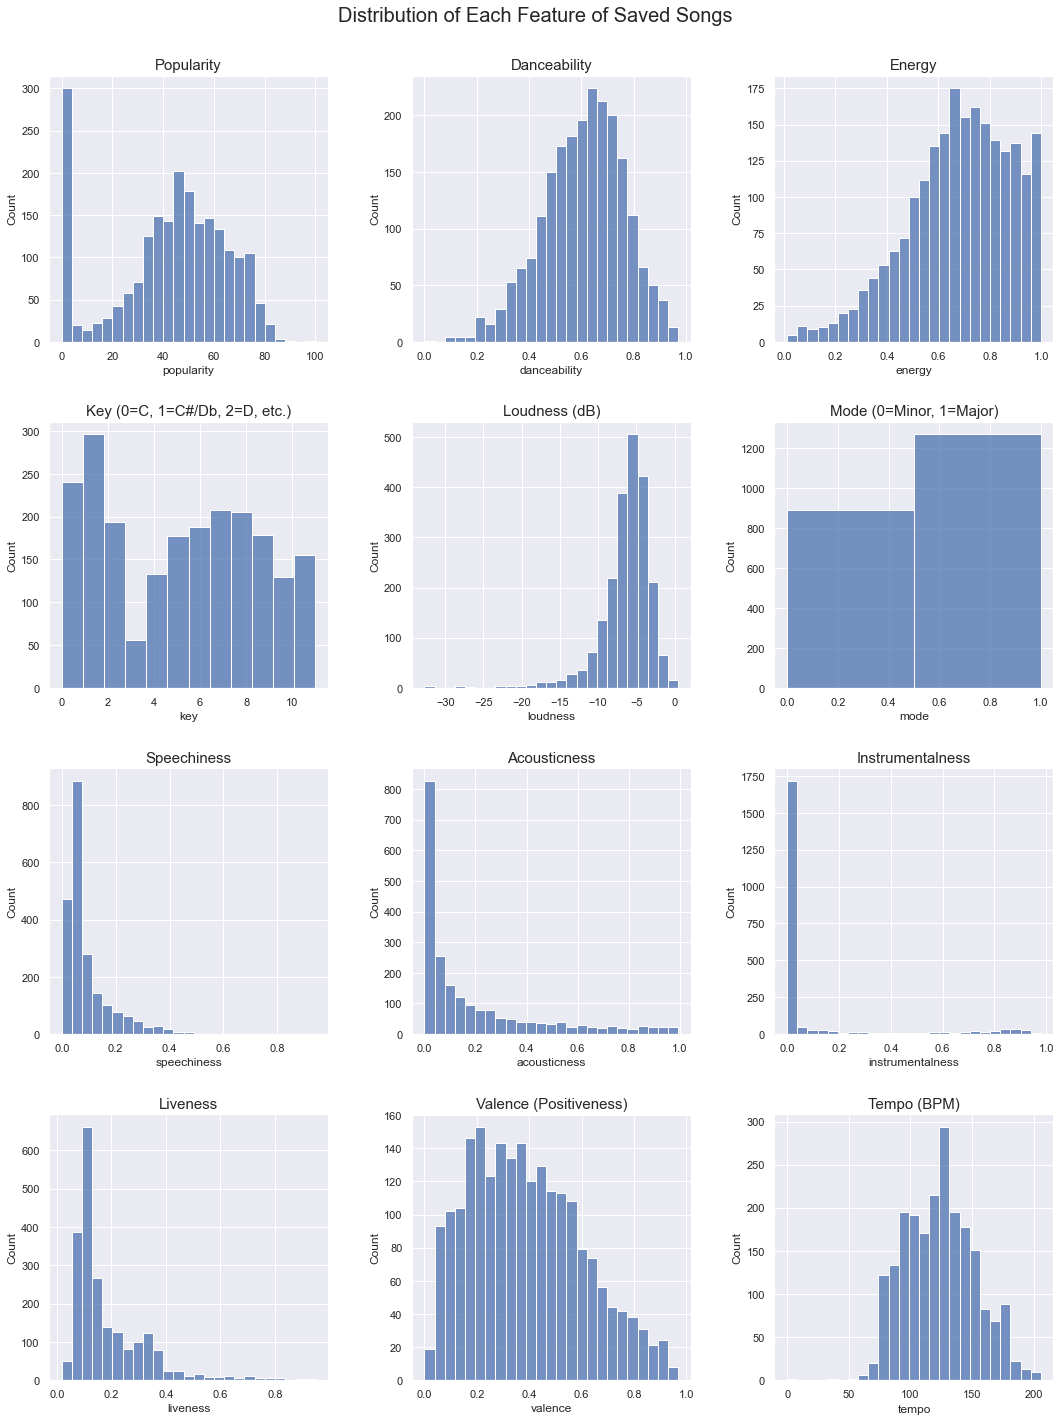

In [4]:
f, axes = plt.subplots(4, 3, figsize=(18,24))
f.subplots_adjust(wspace=0.3, hspace=0.3)

f.suptitle('Distribution of Each Feature of Saved Songs', y=0.92, fontsize=20)

sns.histplot(popularity, ax=axes[0,0], bins=25)
axes[0,0].set_title('Popularity', fontdict={'fontsize': 15})

sns.histplot(danceability, ax=axes[0,1], bins=25)
axes[0,1].set_title('Danceability', fontdict={'fontsize': 15})

sns.histplot(energy, ax=axes[0,2], bins=25)
axes[0,2].set_title('Energy', fontdict={'fontsize': 15})

sns.histplot(key, ax=axes[1,0], bins=12)
axes[1,0].set_title('Key (0=C, 1=C#/Db, 2=D, etc.)', fontdict={'fontsize': 15})

sns.histplot(loudness, ax=axes[1,1], bins=25)
axes[1,1].set_title('Loudness (dB)', fontdict={'fontsize': 15})

sns.histplot(mode, ax=axes[1,2], bins=2)
axes[1,2].set_title('Mode (0=Minor, 1=Major)', fontdict={'fontsize': 15})

sns.histplot(speechiness, ax=axes[2,0], bins=25)
axes[2,0].set_title('Speechiness', fontdict={'fontsize': 15})

sns.histplot(acousticness, ax=axes[2,1], bins=25)
axes[2,1].set_title('Acousticness', fontdict={'fontsize': 15})

sns.histplot(instrumentalness, ax=axes[2,2], bins=25)
axes[2,2].set_title('Instrumentalness', fontdict={'fontsize': 15})

sns.histplot(liveness, ax=axes[3,0], bins=25)
axes[3,0].set_title('Liveness', fontdict={'fontsize': 15})

sns.histplot(valence, ax=axes[3,1], bins=25)
axes[3,1].set_title('Valence (Positiveness)', fontdict={'fontsize': 15})

sns.histplot(tempo, ax=axes[3,2], bins=25)
axes[3,2].set_title('Tempo (BPM)', fontdict={'fontsize': 15});

### Convert the date/time to datetime objects

In [10]:
date_time_added = saved_songs_df['added_at']
dateTimeConv = pd.to_datetime(date_time_added, errors='raise', yearfirst=True, format='%Y-%m-%dT%H:%M:%SZ')
dateTime = dateTimeConv.to_numpy(dtype='datetime64[s]')

### Plot frequency of songs saved by date

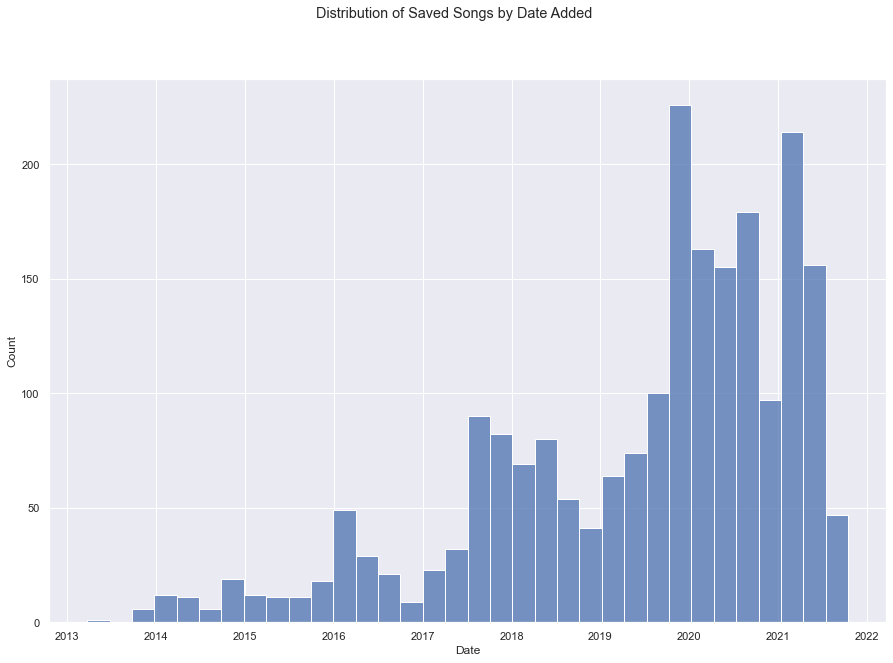

In [14]:
fig_2, ax_2 = plt.subplots(1, 1, figsize=(15,10))
fig_2.suptitle('Distribution of Saved Songs by Date Added')

#edges = np.histogram_bin_edges(dateTime, bins=36, range=(range_date[0], range_date[1]))
sns.histplot(dateTime, ax=ax_2, binwidth=92)
ax_2.set_xlabel('Date');

### 2D histograms of features plotted against date added

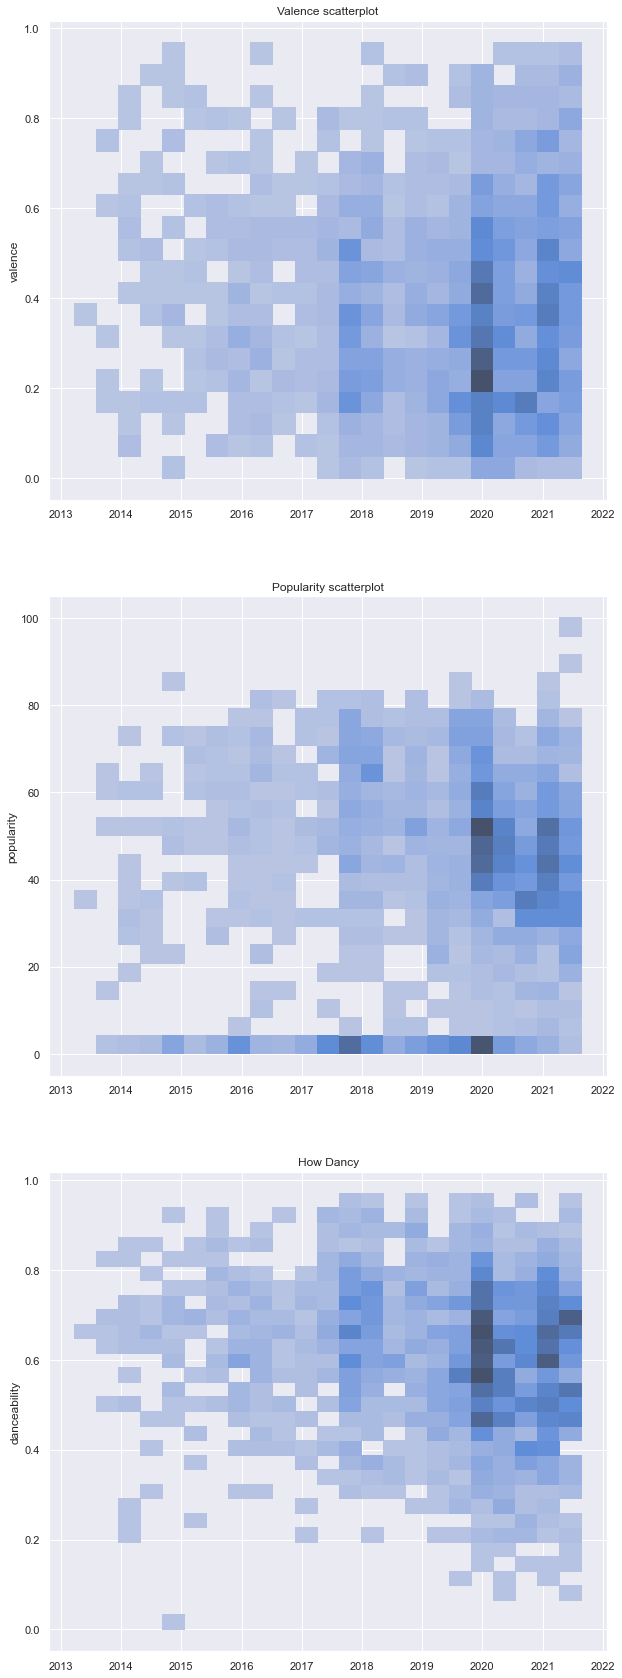

In [23]:
fig_3, ax_3 = plt.subplots(3, 1, figsize=(10,30))

sns.histplot(x=dateTime, y=valence, ax=ax_3[0])
ax_3[0].set_title("Valence scatterplot")
sns.histplot(x=dateTime, y=popularity, ax=ax_3[1])
ax_3[1].set_title("Popularity scatterplot")
sns.histplot(x=dateTime, y=danceability, ax=ax_3[2])
ax_3[2].set_title("How Dancy");

Instead of a 2D histogram, the average value of a feature should be plotted per time period (i.e. 1 month or 3 months), as the 2D histograms make it hard to look for trends. Additionally, other features should be plotted against time to observe their trends.

### Plot audio features against each other and observe their relationships

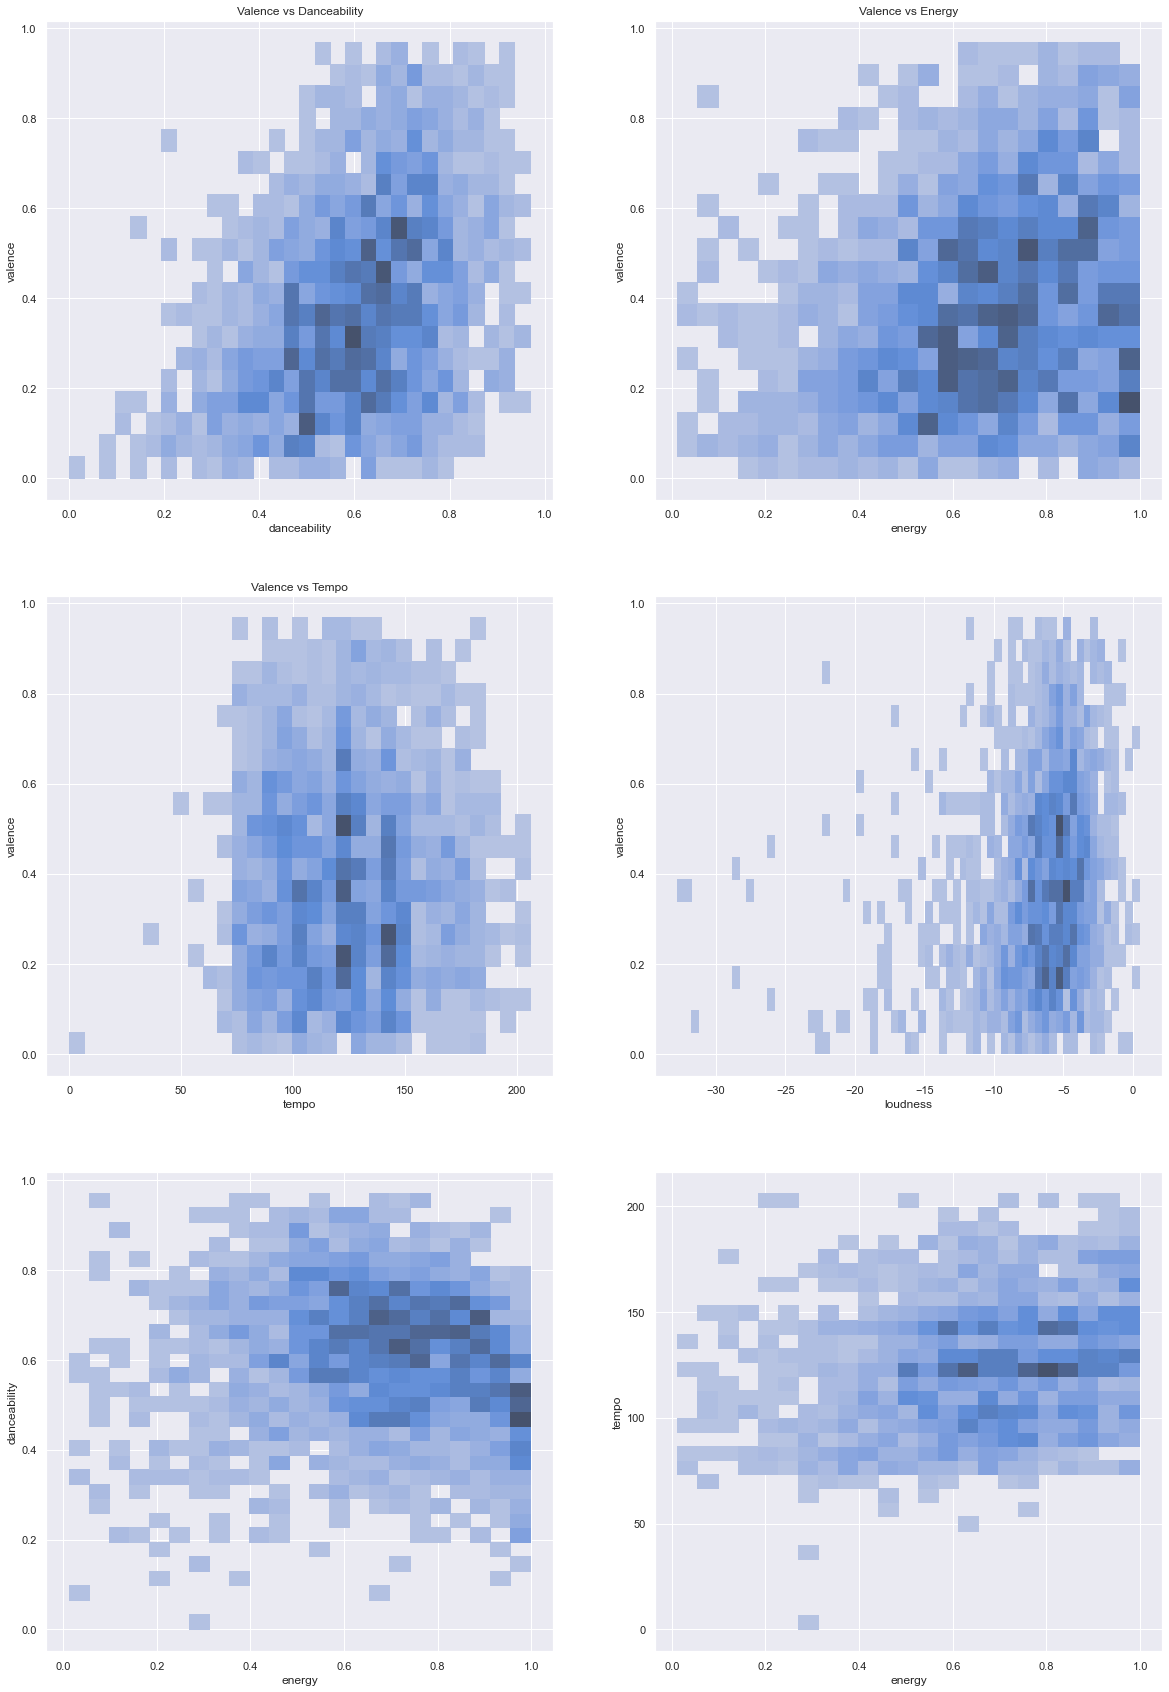

In [24]:
fig_4, ax_4 = plt.subplots(3, 2, figsize=(20,30))

sns.histplot(x=danceability, y=valence, ax=ax_4[0, 0])
ax_4[0,0].set_title('Valence vs Danceability')

sns.histplot(x=energy, y=valence, ax=ax_4[0, 1])
ax_4[0,1].set_title('Valence vs Energy')

sns.histplot(x=tempo, y=valence, ax=ax_4[1,0])
ax_4[1,0].set_title('Valence vs Tempo')

sns.histplot(x=loudness, y=valence, ax=ax_4[1,1])

sns.histplot(x=energy, y=danceability, ax=ax_4[2,0])

sns.histplot(x=energy, y=tempo, ax=ax_4[2,1]);

### Grab songs by the year added and observe trends within individual years

In [33]:
saved_songs_df[saved_songs_df['added_at'].str.contains('2021')].head()

,id,name,album,artist,popularity,added_at,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,751gBcu62kORDelX7FV0mM,Thank You,No Angel,Dido,58,2021-08-27T05:32:10Z,0.722,0.595,1,-9.928,0,0.0415,0.284000,0.00054,0.0694,0.7380,79.981,4
1,7zKncUwLtKCMzwhEb3Jiqd,Overkill,Overkill,RIOT,48,2021-08-27T05:19:49Z,0.435,0.956,8,-1.369,0,0.1440,0.000448,0.65500,0.3430,0.1030,174.029,4
2,7eYYwvDDg5fBWdYqntL1lI,Angelic Layer,Cruel Choreography,GHOST DATA,32,2021-08-26T07:00:46Z,0.754,0.588,2,-5.993,0,0.0544,0.030900,0.60100,0.1090,0.0902,128.017,4
3,0nJ7Y8j5JoegBoXqHM9pJ6,Ashes,Ashes,Hellberg,30,2021-08-25T07:30:22Z,0.600,0.671,6,-7.666,0,0.0502,0.003880,0.04000,0.1780,0.2970,128.038,4
4,4i5McfiyWkcmVhV8A9oTbv,Last Star,Last Star,James Ivy,40,2021-08-24T22:14:20Z,0.522,0.896,7,-4.901,1,0.0351,0.008870,0.00000,0.2340,0.5050,101.026,4


In [31]:
def get_by_date(df, year=None, month=None):
    filtered_df = None
    
    if month is None:
        filtered_df = df[df['added_at'].str.contains(str(year))]
    elif month < 10:
        filtered_df =  df[df['added_at'].str.contains(str(year) + '-0' +  str(month))]
    elif month <= 12:
        filtered_df = df[df['added_at'].str.contains(str(year) + '-' + str(month))]
    
    return filtered_df

In [32]:
thirteen_data = get_by_date(saved_songs_df, 2013)
fourteen_data = get_by_date(saved_songs_df, 2014)
fifteen_data = get_by_date(saved_songs_df, 2015)
sixteen_data = get_by_date(saved_songs_df, 2016)
seventeen_data = get_by_date(saved_songs_df, 2017)
eighteen_data = get_by_date(saved_songs_df, 2018)
nineteen_data = get_by_date(saved_songs_df, 2019)
twenty_data = get_by_date(saved_songs_df, 2020)
twoone_data = get_by_date(saved_songs_df, 2021)